**Zomato Data Analysis Project**

*#Step 1 - Import  Libraries*

pandas - data manipulation and analysis
numpy - numerical operation
matplotlib.pyplot & seaborn - data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*#Step 2 -Create the dataframe*

In [10]:
dataset = pd.read_csv("C:/Users/athar/Desktop/data_science/Zomato data .csv")


In [11]:
dataset.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


In [12]:
dataset

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**QUESTIONS**

#1.What type of restaurant do the majority of customers order from?

#2.How many votes has each type of restaurant received from customers?

#3.What are the ratings that the majority of restaurants have received?

#4.Zomato has observed that most couples order most of their food online.What is their avg spending on each other?

#5.Which mode(online or offline) has received the max ratings?

#6.Which type of restaurant received more offliine orders,so that zomato can prove customers with some good offer

**#Convert the data type of the column -rate**

In [16]:
#user-defined function
def handleRate(value):
    value = str(value).split('/') #split-remove the values after / [4.1/5]
    value = value[0];  #4.1 should start from 0 position
    return float(value)
   
dataset['rate'] = dataset['rate'].apply(handleRate)  #apply - so that we don't need to write for each row separately
print(dataset.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [17]:
dataset.info() #gives information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [18]:
#non-null - no missing value

#1.What type of restaurant do the majority of customers order from?

In [19]:
dataset.head() 

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

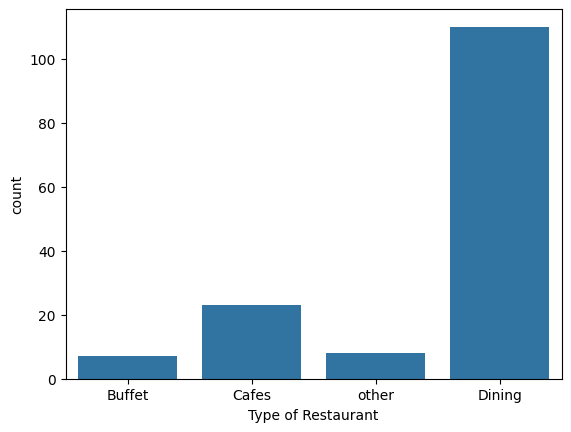

In [20]:
sns.countplot(x=dataset['listed_in(type)'])
plt.xlabel("Type of Restaurant")       #data analysis

Conclusion - majority of the restaurant falls in dining category

#2.How many votes has each type of restaurant received from customers?

In [22]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

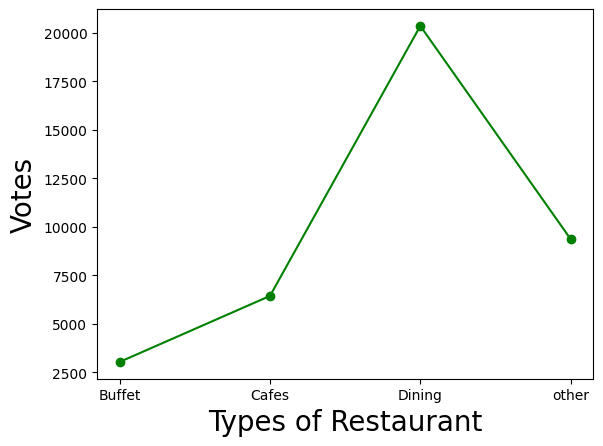

In [27]:
#create var(grouped_data)
#group_by 2 columns and add them
grouped_data = dataset.groupby('listed_in(type)')['votes'].sum() 
#creates a DataFrame called result from the grouped_data Series. 
#The DataFrame has a single column named 'votes', which contains the summed votes for each restaurant type. 
#The index of this DataFrame will be the restaurant types.
result = pd.DataFrame({'votes':grouped_data})
#Plot the result DataFrame. 
#The x-axis will automatically be the index of the DataFrame (restaurant types)
#y-axis will be the 'votes' column.
plt.plot(result,c="green",marker="o")
plt.xlabel("Types of Restaurant",size=20)
plt.ylabel("Votes",size=20)

Conclusion - Dining restaurants has received maximum votes

#3.What are the ratings that the majority of restaurants have received?

In [28]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


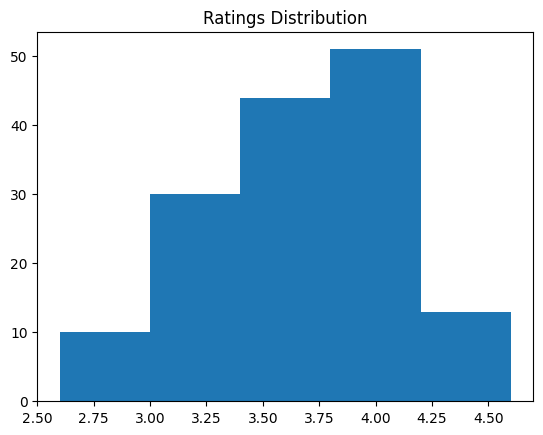

In [31]:
plt.hist(dataset['rate'],bins=5) #bars = bins
plt.title("Ratings Distribution")
plt.show()

Conclusion - The majority restaurants received ratings from 3.5-4

#4.Zomato has observed that most couples order most of their food online.What is their avg spending on each other?

In [32]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

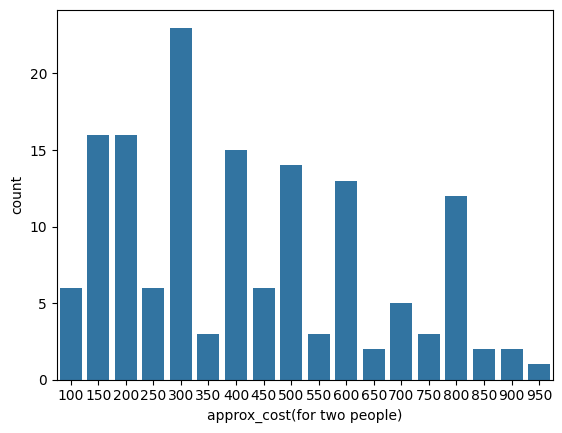

In [36]:
#create var couple_data and write the col_name
#plot count_plot
couple_data=dataset['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion - The majority of couples prefer restaurants with an approximate cost of 300 rupees

#5.Which mode(online or offline) has received the max ratings?

In [37]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

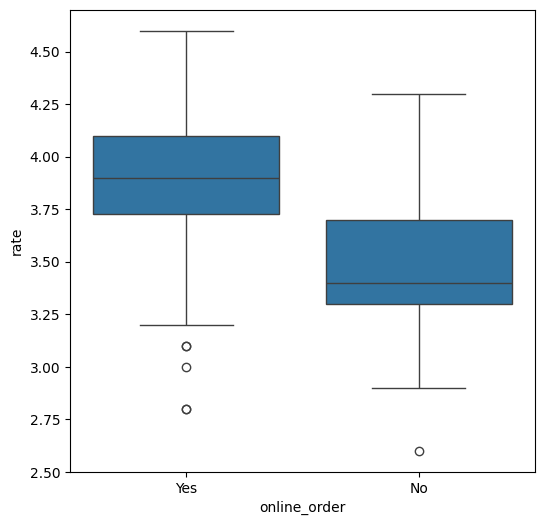

In [41]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',data=dataset)

Conclusion - Offline order receives lower ratings in comparison to online order

#6.Which type of restaurant received more offliine orders,so that zomato can prove customers with some good offer

In [42]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


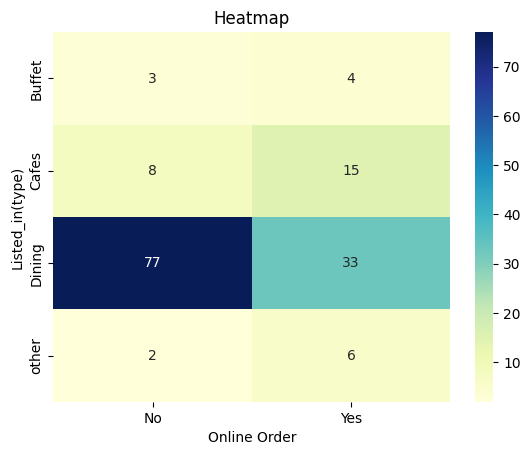

In [46]:
# Create a pivot_table with 'listed_in(type)' as the index, 'online_order' as columns,
# and counts the occurrences (aggfunc='size'), filling missing values with 0.
pivot_table = dataset.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plot a heatmap of the pivot table with annotations, using the 'YlGnBu' color map,
# and formats values as integers (fmt='d').
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed_in(type)")
plt.show()

Conclusion - Dining res(offline),Cafes(online).This suggests that clients prefer orders in person at res,but prefer online ordering at cafes